# Airpollution data for leeds from texmex package

Air pollution data from Leeds (U.K.) city centre, collected from 1994 to 1998. 

$\rightarrow$ we are interested if there are dependences in the data that can be exploited to reduce dimensionality of the extreme events.

In [1]:
library(texmex)
library(ggplot2)
library(dplyr)
library(reshape2)
library(tibble)
library(maxstablePCA)

Loading required package: mvtnorm

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
summer <- as_tibble(summer)
head(summer)

O3,NO2,NO,SO2,PM10
<int>,<int>,<int>,<int>,<int>
32,48,94,8,27
29,49,86,6,25
32,34,16,20,32
32,35,79,9,22
33,50,108,11,24
27,58,92,16,26


# Basic overview data

4 columns of gasses in ppb, PM10 is column of particle matters in microgram/m^3

In [51]:
summary(summer)

       O3          NO2               NO              SO2        
 Min.   : 8   Min.   :  9.00   Min.   :  4.00   Min.   :  0.00  
 1st Qu.:26   1st Qu.: 30.00   1st Qu.: 30.00   1st Qu.:  5.00  
 Median :31   Median : 36.00   Median : 47.00   Median :  8.00  
 Mean   :32   Mean   : 37.63   Mean   : 55.20   Mean   : 17.37  
 3rd Qu.:36   3rd Qu.: 45.00   3rd Qu.: 71.75   3rd Qu.: 15.00  
 Max.   :84   Max.   :105.00   Max.   :256.00   Max.   :313.00  
      PM10       
 Min.   :  9.00  
 1st Qu.: 26.00  
 Median : 34.00  
 Mean   : 41.12  
 3rd Qu.: 50.00  
 Max.   :185.00  

# Transform to unit Fréchet and look at bivariate plots

$\rightarrow$ use provided transformation function  using the classic transformation from Resnick with empirical distributions. 

Plots are on the following slides.

In [4]:
summer_trafo <- transform_unitfrechet(summer) %>% as_tibble()

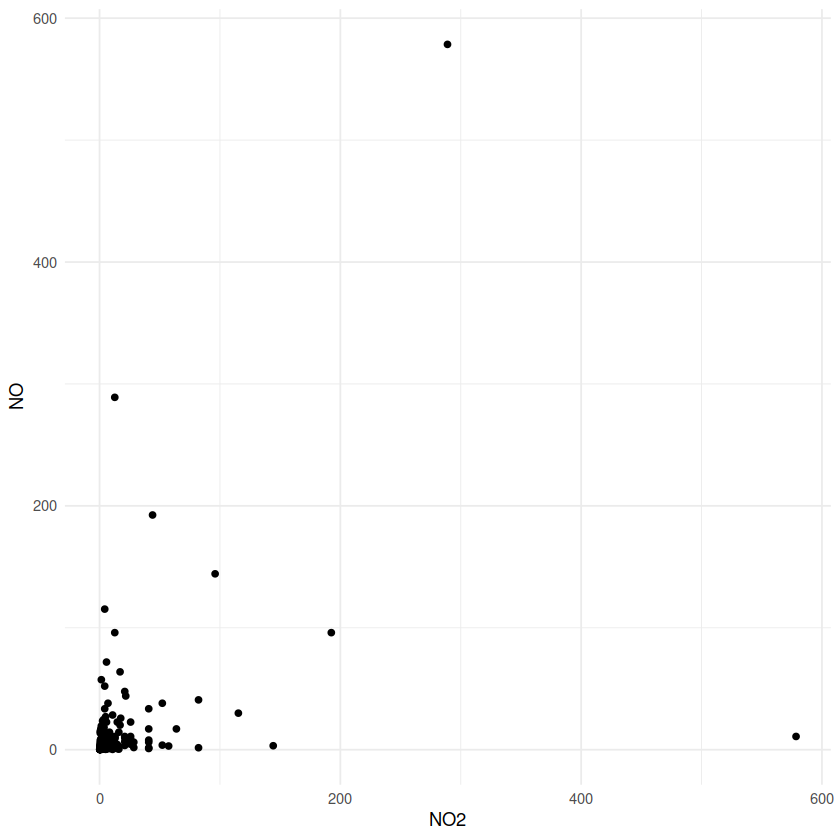

In [5]:
ggplot(summer_trafo, aes(x = NO2, y = NO)) +
geom_point() + 
theme_minimal()

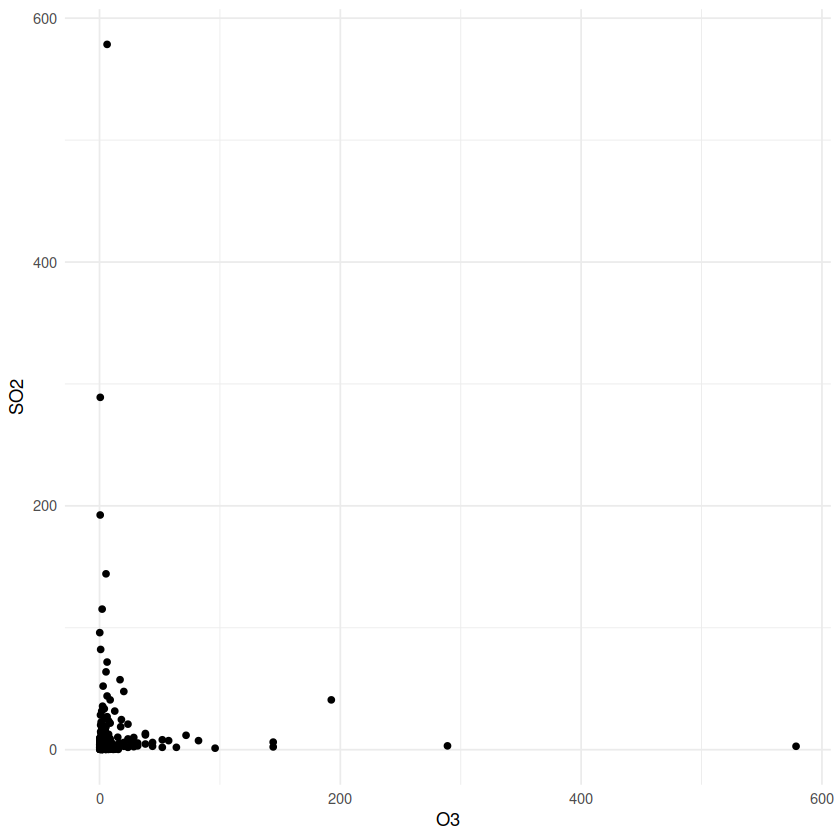

In [6]:
ggplot(summer_trafo, aes(x = O3, y = SO2)) +
geom_point() + 
theme_minimal()

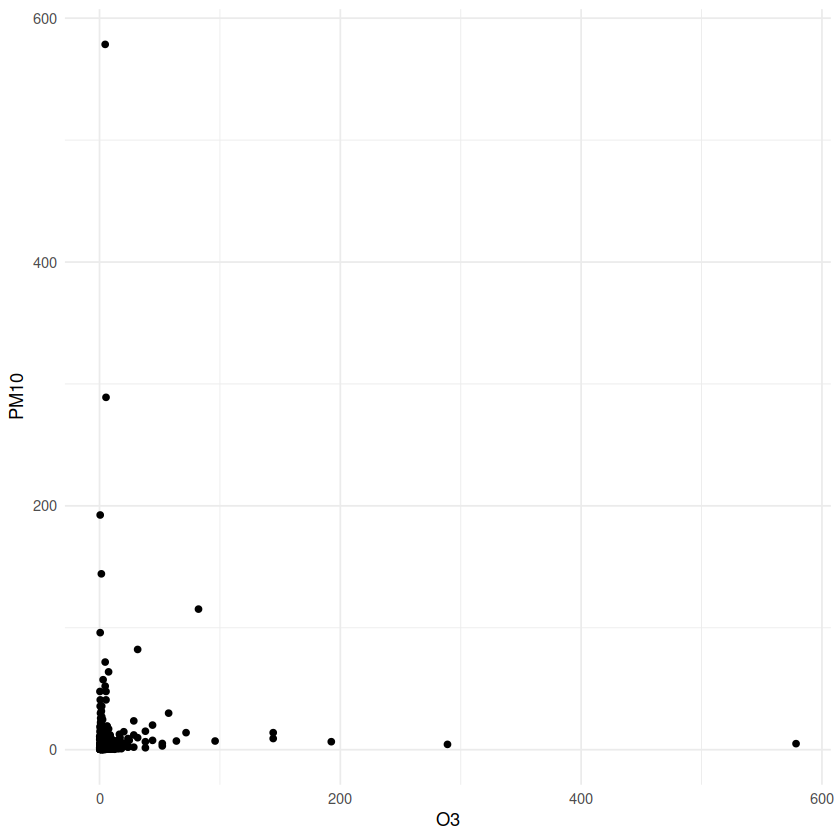

In [7]:
ggplot(summer_trafo, aes(x = O3, y = PM10)) +
geom_point() + 
theme_minimal()

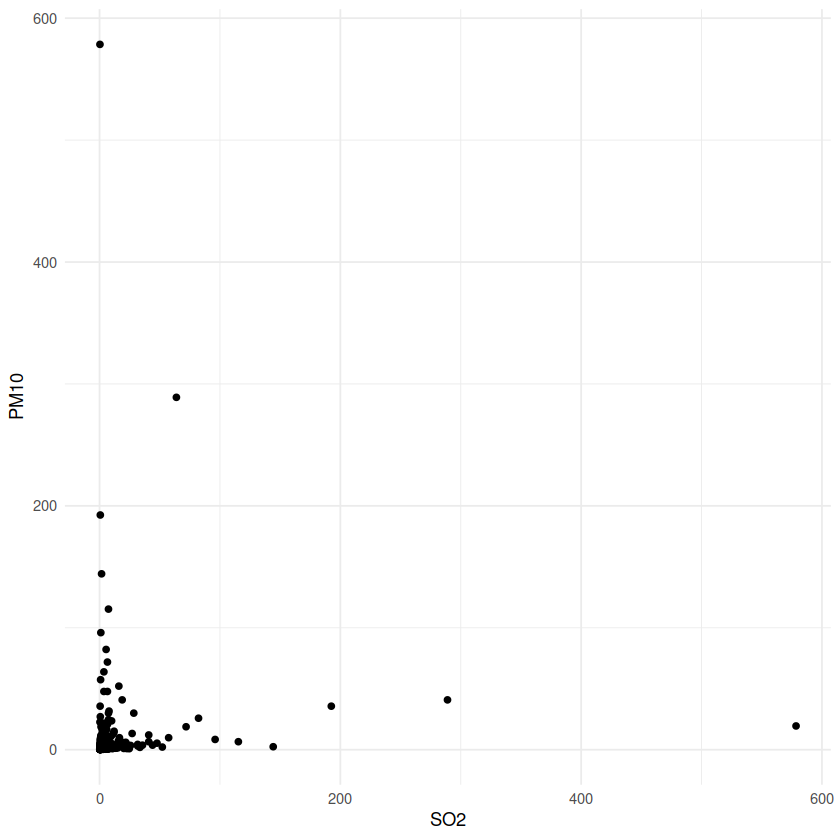

In [8]:
ggplot(summer_trafo, aes(x = SO2, y = PM10)) +
geom_point() + 
theme_minimal()

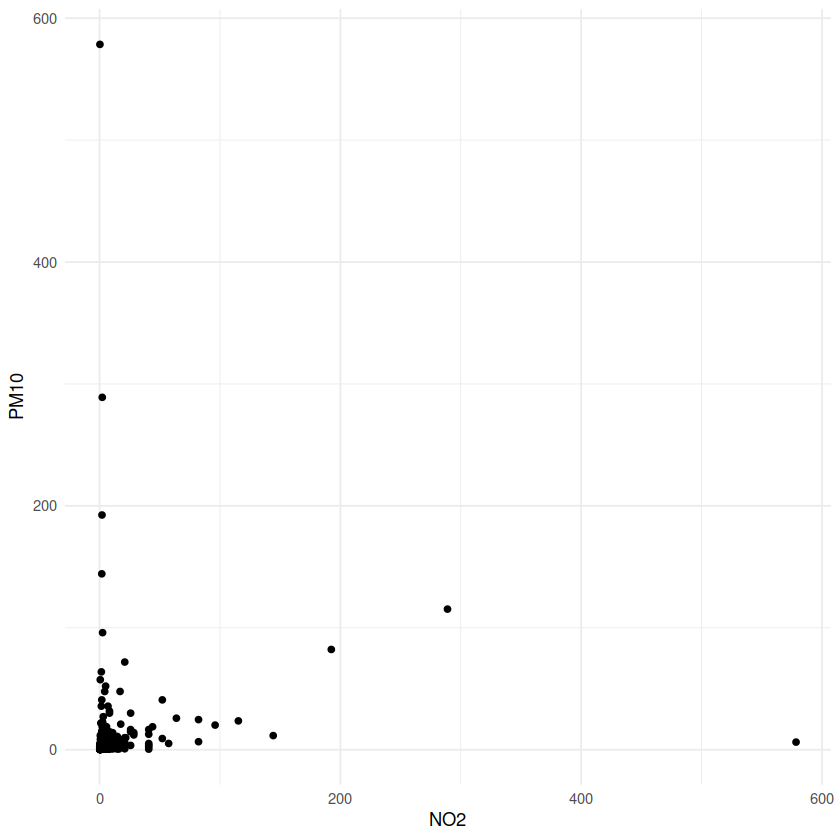

In [9]:
ggplot(summer_trafo, aes(x = NO2, y = PM10)) +
geom_point() + 
theme_minimal()

# Since dataset is reasonably small, fit max stable PCA's with p = 1,...,4 to the data

Use function *max_stable_prcomp* from package for transformation.

In [10]:
maxPCA1 <- max_stable_prcomp(summer_trafo, p = 1, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [11]:
maxPCA2 <- max_stable_prcomp(summer_trafo, p = 2, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [12]:
maxPCA3 <- max_stable_prcomp(summer_trafo, p = 3, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [42]:
maxPCA4 <- max_stable_prcomp(summer_trafo, p = 4, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



# Taking note of the encoder matrix can give clues on causal relationships

In [14]:
maxPCA1

$p
[1] 1

$d
[1] 5

$decoder_matrix
          [,1]
[1,] 0.7130168
[2,] 4.3347407
[3,] 1.1268525
[4,] 0.1228095
[5,] 0.8880728

$encoder_matrix
            [,1]      [,2]        [,3]         [,4]         [,5]
[1,] 0.001308781 0.2306943 0.009374207 0.0005675352 8.033958e-05

$reconstr_matrix
             [,1]       [,2]        [,3]         [,4]         [,5]
[1,] 0.0009331827 0.16448892 0.006683967 4.046621e-04 5.728347e-05
[2,] 0.0056732255 1.00000005 0.040634756 2.460118e-03 3.482512e-04
[3,] 0.0014748030 0.25995848 0.010563349 6.395285e-04 9.053086e-05
[4,] 0.0001607307 0.02833144 0.001151241 6.969869e-05 9.866460e-06
[5,] 0.0011622926 0.20487334 0.008324978 5.040126e-04 7.134739e-05

$loss_fctn_value
[1] 4.493793

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [15]:
maxPCA2

$p
[1] 2

$d
[1] 5

$decoder_matrix
            [,1]         [,2]
[1,] 0.121353615 0.0062912904
[2,] 0.737762228 0.0004253808
[3,] 0.191776990 0.0004261229
[4,] 0.020901075 0.0025972856
[5,] 0.007471932 0.7746472284

$encoder_matrix
            [,1]      [,2]        [,3]        [,4]         [,5]
[1,] 0.010579154 1.3554502 0.002079731 0.008742822 0.0007489027
[2,] 0.002548446 0.0136146 0.003676917 0.011411449 1.2909101960

$reconstr_matrix
             [,1]       [,2]         [,3]         [,4]         [,5]
[1,] 0.0012838186 0.16448878 2.523829e-04 0.0010609731 0.0081214910
[2,] 0.0078049005 0.99999996 1.534347e-03 0.0064501241 0.0005525122
[3,] 0.0020288384 0.25994416 3.988446e-04 0.0016766721 0.0005500864
[4,] 0.0002211157 0.02833037 4.346862e-05 0.0001827344 0.0033528625
[5,] 0.0019741467 0.01054651 2.848313e-03 0.0088398472 1.0000000054

$loss_fctn_value
[1] 3.322876

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [16]:
maxPCA3

$p
[1] 3

$d
[1] 5

$decoder_matrix
             [,1]         [,2]         [,3]
[1,] 0.0006074035 0.0007853511 0.8319093761
[2,] 0.2333862581 0.0042673671 0.0072496952
[3,] 1.0202005218 0.0002902748 0.0007005893
[4,] 0.0215909874 0.0018301114 0.0090321885
[5,] 0.0039287027 0.5455867488 0.0050920719

$encoder_matrix
            [,1]        [,2]         [,3]        [,4]         [,5]
[1,] 0.001029119 0.013729163 0.9801994598 0.005238922 0.0005283399
[2,] 0.004725289 0.019064275 0.0105286148 0.023036387 1.8328901181
[3,] 1.202054771 0.001057601 0.0007205185 0.001988245 0.0032943947

$reconstr_matrix
            [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 1.000000635 0.0008798279 0.0005994061 0.0016540400 0.0027406378
[2,] 0.008714531 0.0032041979 0.2287650842 0.0012226923 0.0078216150
[3,] 0.001049908 0.0140064989 1.0000000004 0.0053447507 0.0005390127
[4,] 0.010857185 0.0002964262 0.0211634742 0.0001131135 0.0033543931
[5,] 0.006120949 0.0104012160 0.0057442727 0.0125683

In [43]:
maxPCA4

$p
[1] 4

$d
[1] 5

$decoder_matrix
            [,1]         [,2]        [,3]        [,4]
[1,] 0.000386976 0.0017036031 0.897496760 0.001086590
[2,] 0.158118311 0.0072772474 0.007818848 0.005364711
[3,] 0.690324223 0.0004080362 0.001007634 0.003943106
[4,] 0.008471863 0.0004751870 0.004337471 0.636433405
[5,] 0.010942289 0.9285530322 0.001335058 0.010750503

$encoder_matrix
            [,1]        [,2]         [,3]        [,4]         [,5]
[1,] 0.001576470 0.022179069 1.4486019949 0.009245796 0.0004746534
[2,] 0.008032496 0.010846423 0.0044415739 0.022604333 1.0769469598
[3,] 1.114222402 0.004295491 0.0006688151 0.001218949 0.0011424188
[4,] 0.006395119 0.002297255 0.0086292240 1.571256994 0.0007481310

$reconstr_matrix
            [,1]        [,2]         [,3]        [,4]         [,5]
[1,] 1.000010996 0.003855190 0.0006002594 0.001707312 0.0018346902
[2,] 0.008711935 0.003506917 0.2290505007 0.008429340 0.0078372094
[3,] 0.001122729 0.015310749 1.0000050462 0.006382597 0.0004394333
[4

# Creating something like a screeplot is possible with the loss and increasing p

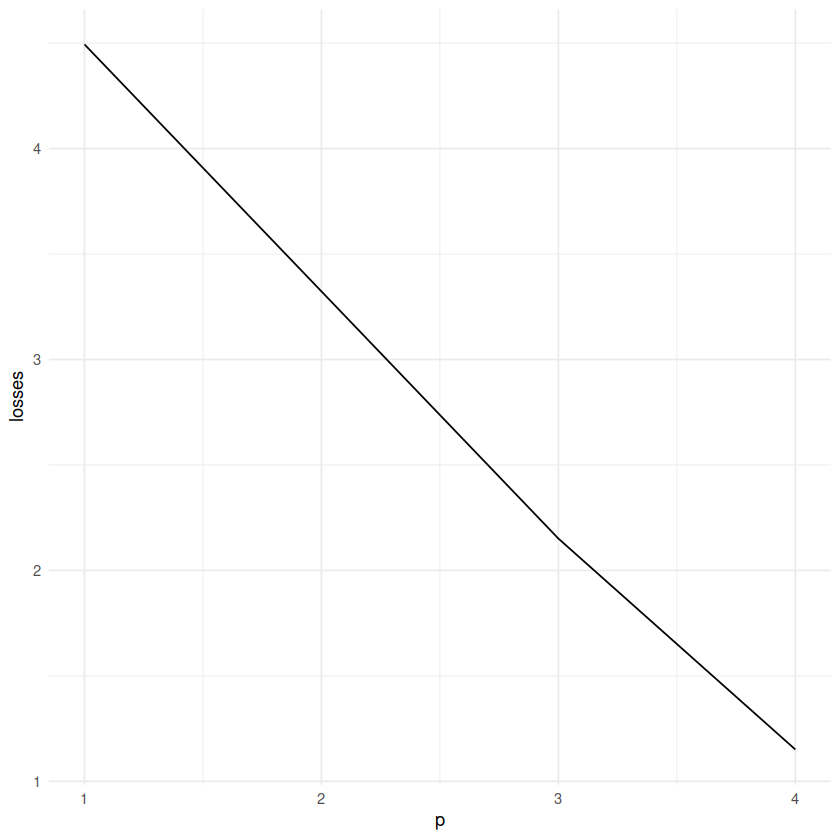

In [44]:
error_vals <- c(
    maxPCA1$loss_fctn_value,
    maxPCA2$loss_fctn_value,
    maxPCA3$loss_fctn_value,
    maxPCA4$loss_fctn_value
)

scree_df <- data.frame(p = 1:4, losses = error_vals) %>% as_tibble()

ggplot(scree_df, aes(x = p, y = losses)) + 
geom_line() + 
theme_minimal()

In [46]:
enc1 <- maxPCA1$encoder_matrix
enc2 <- maxPCA2$encoder_matrix
enc3 <- maxPCA3$encoder_matrix
enc4 <- maxPCA4$encoder_matrix

colnames(enc1) <- names(summer)
colnames(enc2) <- names(summer)
colnames(enc3) <- names(summer)
colnames(enc4) <- names(summer)

row.names(enc1) <- c("PC1")
row.names(enc2) <- c("PC1", "PC2")
row.names(enc3) <- c("PC1", "PC2", "PC3")
row.names(enc4) <- c("PC1", "PC2", "PC3", "PC4")

# Creating a heatmap of the loadings of the components and the reconstructions 

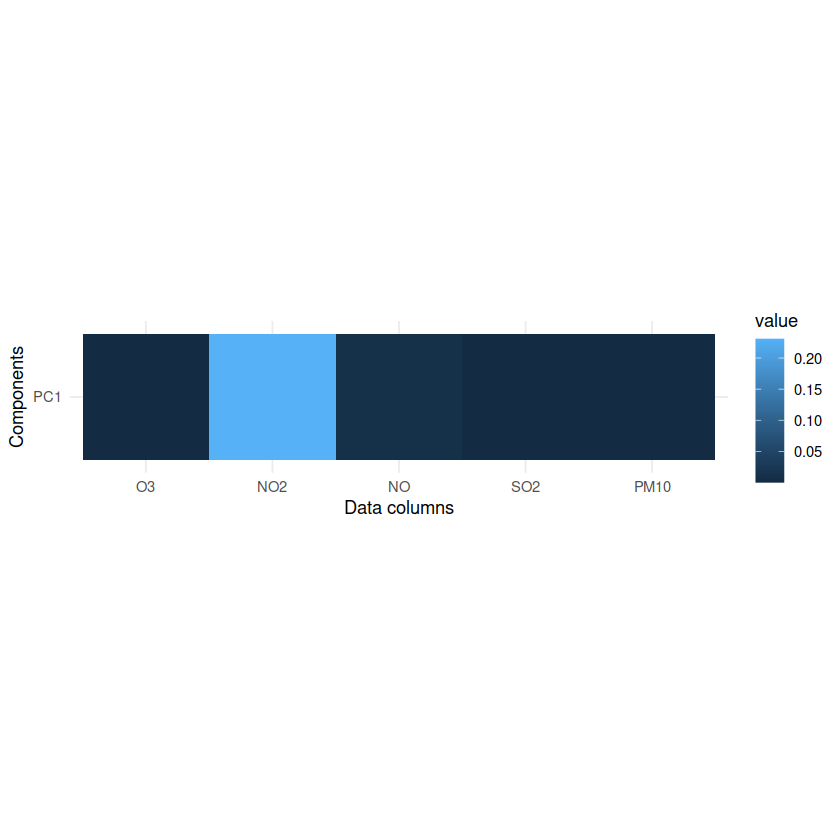

In [20]:
ggplot(melt(t(enc1)), aes(Var1,Var2, fill=value)) + 
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

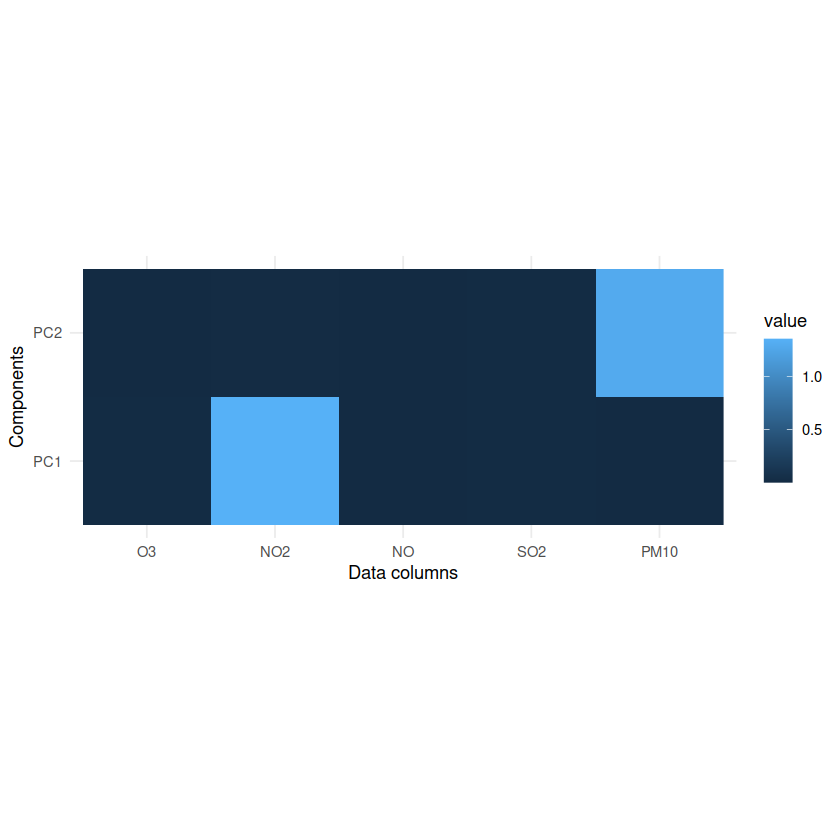

In [21]:
ggplot(melt(t(enc2)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

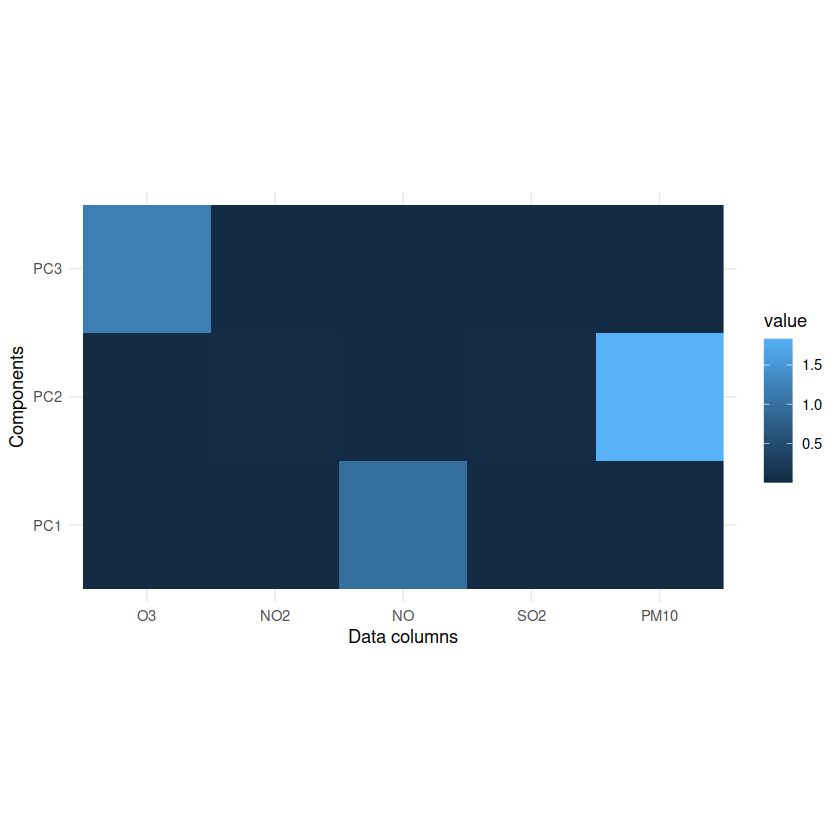

In [22]:
ggplot(melt(t(enc3)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

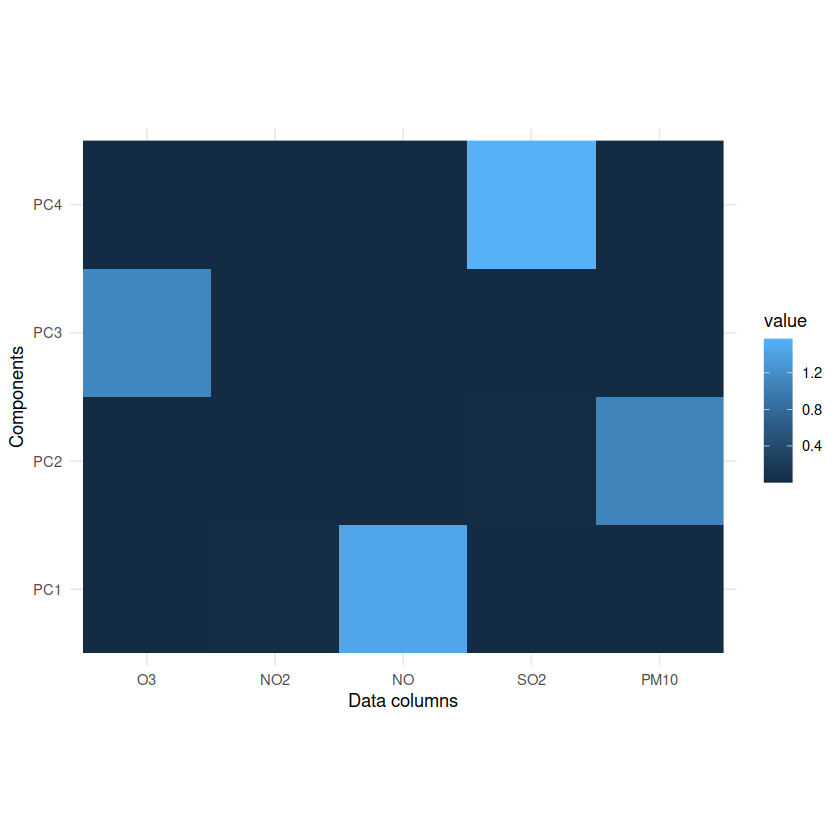

In [47]:
ggplot(melt(t(enc4)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

# Doing the same for the winter data, there is supposed to be more dependence

As indicated by other papers. 

In [24]:
winter <- winter %>% as_tibble()
head(winter)

O3,NO2,NO,SO2,PM10
<int>,<int>,<int>,<int>,<int>
27,50,112,13,34
27,51,126,13,29
15,43,90,21,33
9,71,470,44,101
20,51,167,48,30
8,50,211,16,44


# Visibly more dependence than in summer between NO's and PM10

Plots again on the following slides

In [25]:
winter_trafo <- transform_unitfrechet(winter) %>% as_tibble()

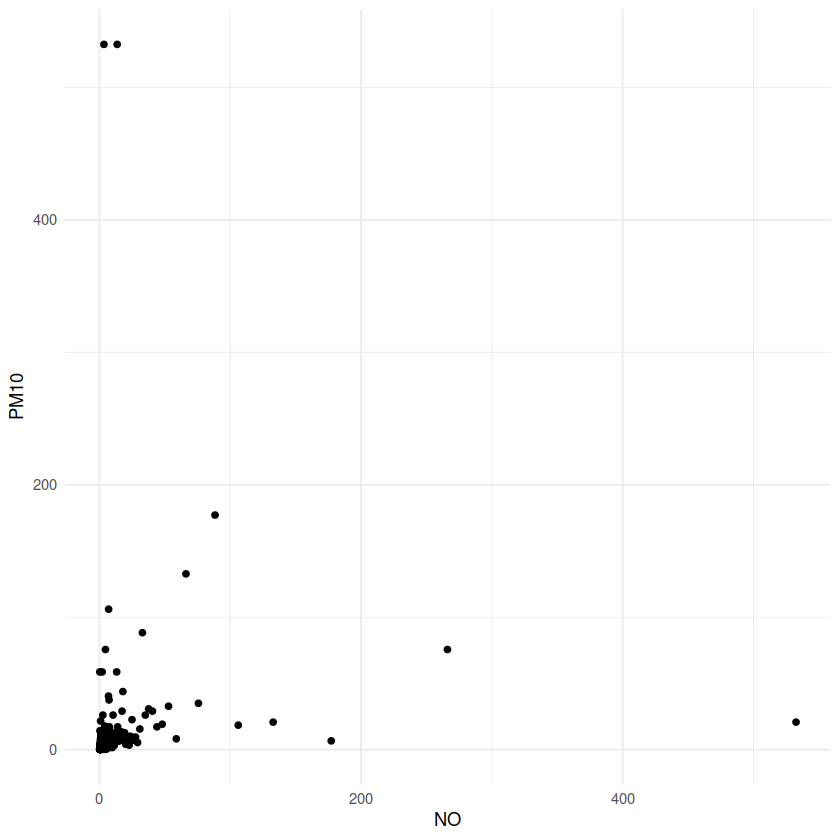

In [26]:
ggplot(winter_trafo, aes(x = NO, y = PM10)) +
geom_point() + 
theme_minimal()

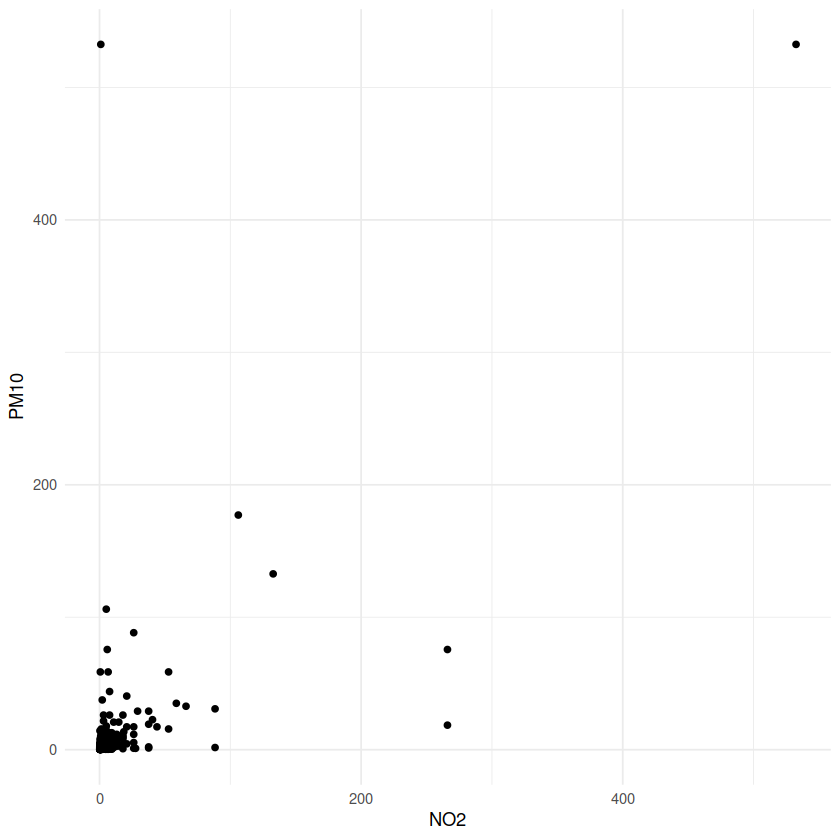

In [27]:
ggplot(winter_trafo, aes(x = NO2, y = PM10)) +
geom_point() + 
theme_minimal()

# Inspect closer by applying max stable PCA for p = 1,...,4 again

In [28]:
maxPCA_w1 <- max_stable_prcomp(winter_trafo, p = 1, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [29]:
maxPCA_w2 <- max_stable_prcomp(winter_trafo, p = 2, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [30]:
maxPCA_w3 <- max_stable_prcomp(winter_trafo, p = 3, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [31]:
maxPCA_w4 <- max_stable_prcomp(winter_trafo, p = 4, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



# Again look at loadings

In [32]:
maxPCA_w1

$p
[1] 1

$d
[1] 5

$decoder_matrix
           [,1]
[1,] 0.02094808
[2,] 4.75213639
[3,] 2.36708996
[4,] 0.09101317
[5,] 2.83497197

$encoder_matrix
             [,1]      [,2]       [,3]        [,4]        [,5]
[1,] 2.980203e-05 0.2104316 0.01331853 0.001405725 0.002711721

$reconstr_matrix
             [,1]        [,2]         [,3]         [,4]         [,5]
[1,] 6.242952e-07 0.004408136 0.0002789976 2.944723e-05 5.680534e-05
[2,] 1.416233e-04 0.999999479 0.0632914754 6.680196e-03 1.288647e-02
[3,] 7.054408e-05 0.498110436 0.0315261608 3.327477e-03 6.418887e-03
[4,] 2.712377e-06 0.019152044 0.0012121618 1.279395e-04 2.468023e-04
[5,] 8.448792e-05 0.596567577 0.0377576618 3.985191e-03 7.687653e-03

$loss_fctn_value
[1] 4.214856

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [33]:
maxPCA_w2

$p
[1] 2

$d
[1] 5

$decoder_matrix
             [,1]         [,2]
[1,] 1.0541030067 0.0007136675
[2,] 0.0008998942 0.8341450966
[3,] 0.0004360762 0.4154952783
[4,] 0.0023125440 0.0159752587
[5,] 0.0015532187 0.4976266592

$encoder_matrix
             [,1]        [,2]        [,3]         [,4]         [,5]
[1,] 0.9486734830 0.001005139 0.001518964 0.0008062298 0.0004246686
[2,] 0.0005116095 1.198832230 0.019074514 0.0080182735 0.0154717555

$reconstr_matrix
             [,1]       [,2]         [,3]         [,4]         [,5]
[1,] 0.9999995708 0.00105952 0.0016011445 0.0008498492 0.0004476445
[2,] 0.0008537057 1.00000003 0.0159109125 0.0066884035 0.0129056890
[3,] 0.0004136940 0.49810913 0.0079253706 0.0033315548 0.0064284414
[4,] 0.0021938492 0.01915166 0.0003047203 0.0001280940 0.0002471653
[5,] 0.0014734974 0.59657088 0.0094919868 0.0039901066 0.0076991580

$loss_fctn_value
[1] 3.229797

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [34]:
maxPCA_w3

$p
[1] 3

$d
[1] 5

$decoder_matrix
             [,1]        [,2]         [,3]
[1,] 0.5484880355 0.001065967 0.0009176085
[2,] 0.0008776682 0.916731968 0.0478837859
[3,] 0.0003629189 0.004060015 1.5990801209
[4,] 0.0012294722 0.005830638 0.1318858088
[5,] 0.0007183796 0.916584632 0.0079786011

$encoder_matrix
             [,1]        [,2]       [,3]        [,4]        [,5]
[1,] 1.8231317634 0.001183893 0.00195320 0.001567917 0.001705669
[2,] 0.0006467520 0.667755169 0.03807181 0.002037743 1.091006648
[3,] 0.0003456883 0.010663626 0.62536215 0.001969337 0.003846193

$reconstr_matrix
             [,1]         [,2]        [,3]         [,4]        [,5]
[1,] 0.9999659593 0.0007118053 0.001071307 0.0008599839 0.001162978
[2,] 0.0016001048 0.6121525103 0.034901649 0.0018680643 1.000160671
[3,] 0.0006616489 0.0170519917 1.000004189 0.0031491278 0.006150371
[4,] 0.0022414897 0.0038934384 0.082476394 0.0002597276 0.006361264
[5,] 0.0013097007 0.6120541263 0.034896040 0.0018677641 0.999999928

$l

In [35]:
maxPCA_w4

$p
[1] 4

$d
[1] 5

$decoder_matrix
             [,1]        [,2]        [,3]         [,4]
[1,] 0.6401290136 0.001475775 0.002447424 0.0005357467
[2,] 0.0081838147 0.724222890 0.028057830 0.0015010151
[3,] 0.0003939985 0.003181859 1.519072288 0.0007771276
[4,] 0.0007477861 0.006949446 0.012820743 0.6671485998
[5,] 0.0004664900 1.207715525 0.041732256 0.0008592293

$encoder_matrix
             [,1]        [,2]        [,3]        [,4]        [,5]
[1,] 1.5621653180 0.001307218 0.001959723 0.001458272 0.001645256
[2,] 0.0007900217 0.046048124 0.017034276 0.002697159 0.828014864
[3,] 0.0004827968 0.007181903 0.658292254 0.002015415 0.001402026
[4,] 0.0016726963 0.009582221 0.011386382 1.498921095 0.008949638

$reconstr_matrix
             [,1]         [,2]        [,3]         [,4]        [,5]
[1,] 0.9999873442 0.0008367883 0.001611120 0.0009334824 0.001221964
[2,] 0.0127844715 0.0333491057 0.018470252 0.0022499031 0.599667318
[3,] 0.0007334032 0.0109098298 0.999993520 0.0030615612 0.0026346

In [52]:
error_vals_w <- c(
    maxPCA_w1$loss_fctn_value,
    maxPCA_w2$loss_fctn_value,
    maxPCA_w3$loss_fctn_value,
    maxPCA_w4$loss_fctn_value
)

scree_w_df <- data.frame(p = 1:4, losses = error_vals_w) %>% as_tibble()

# Screeplot looks similar to summer months

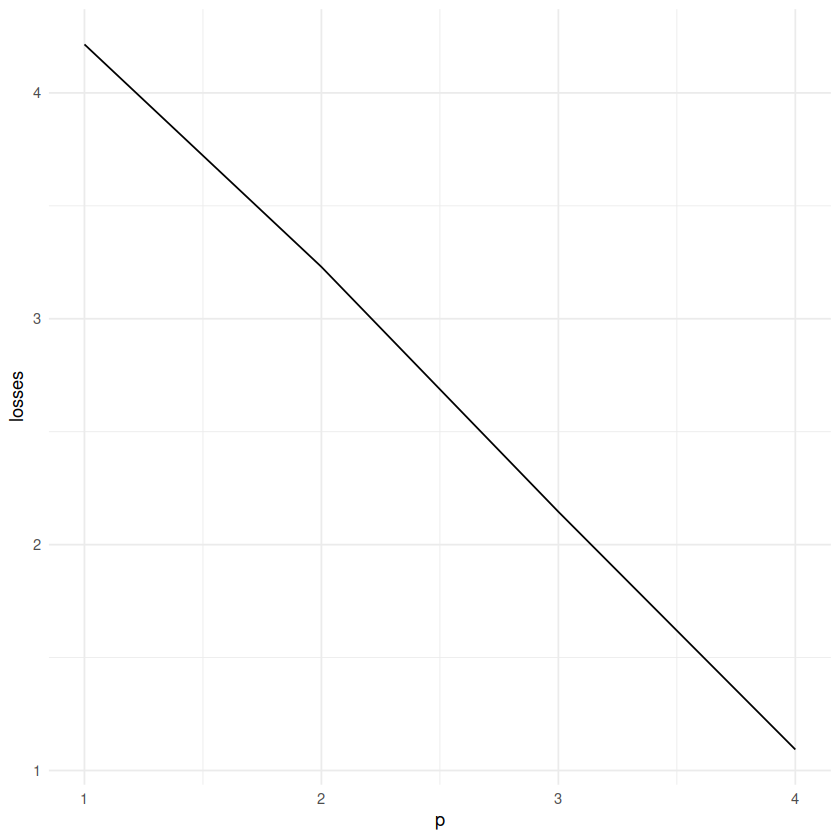

In [36]:
ggplot(scree_w_df, aes(x = p, y = losses)) + 
geom_line() + 
theme_minimal()

In [37]:
enc_w1 <- maxPCA_w1$encoder_matrix
enc_w2 <- maxPCA_w2$encoder_matrix
enc_w3 <- maxPCA_w3$encoder_matrix
enc_w4 <- maxPCA_w4$encoder_matrix

colnames(enc_w1) <- names(summer)
colnames(enc_w2) <- names(summer)
colnames(enc_w3) <- names(summer)
colnames(enc_w4) <- names(summer)

row.names(enc_w1) <- c("PC1")
row.names(enc_w2) <- c("PC1", "PC2")
row.names(enc_w3) <- c("PC1", "PC2", "PC3")
row.names(enc_w4) <- c("PC1", "PC2", "PC3", "PC4")

# Heatmaps for the loadings of the principal components

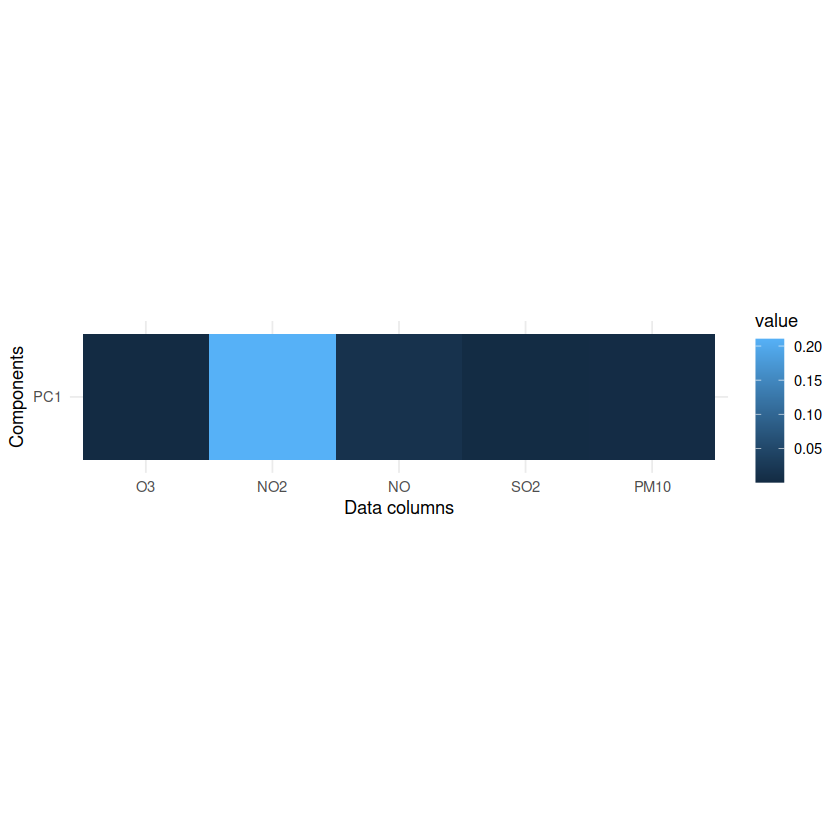

In [38]:
ggplot(melt(t(enc_w1)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

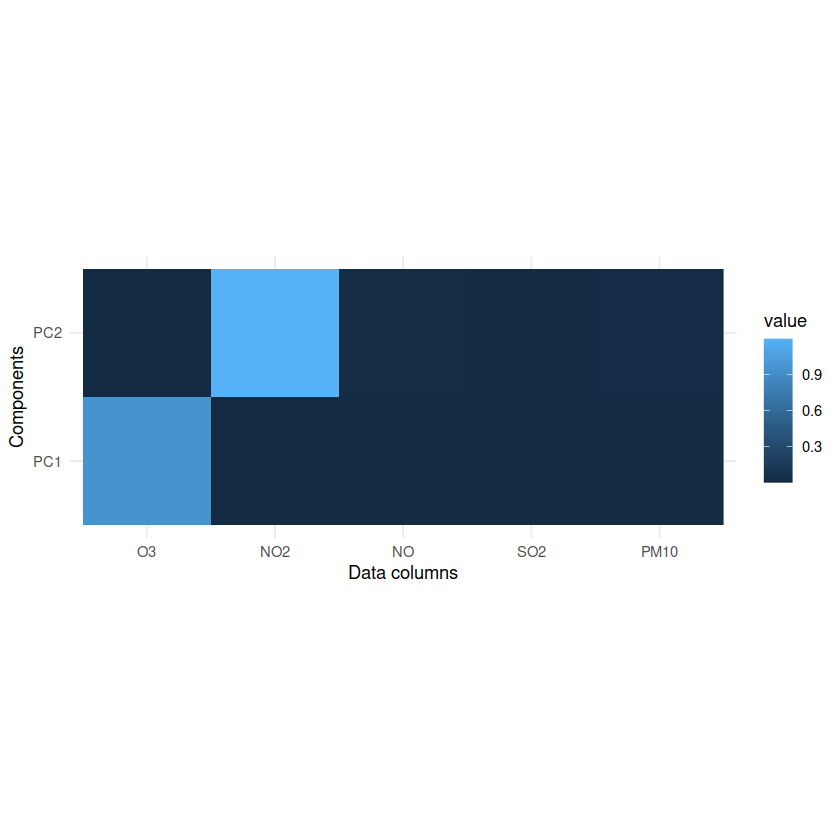

In [39]:
ggplot(melt(t(enc_w2)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

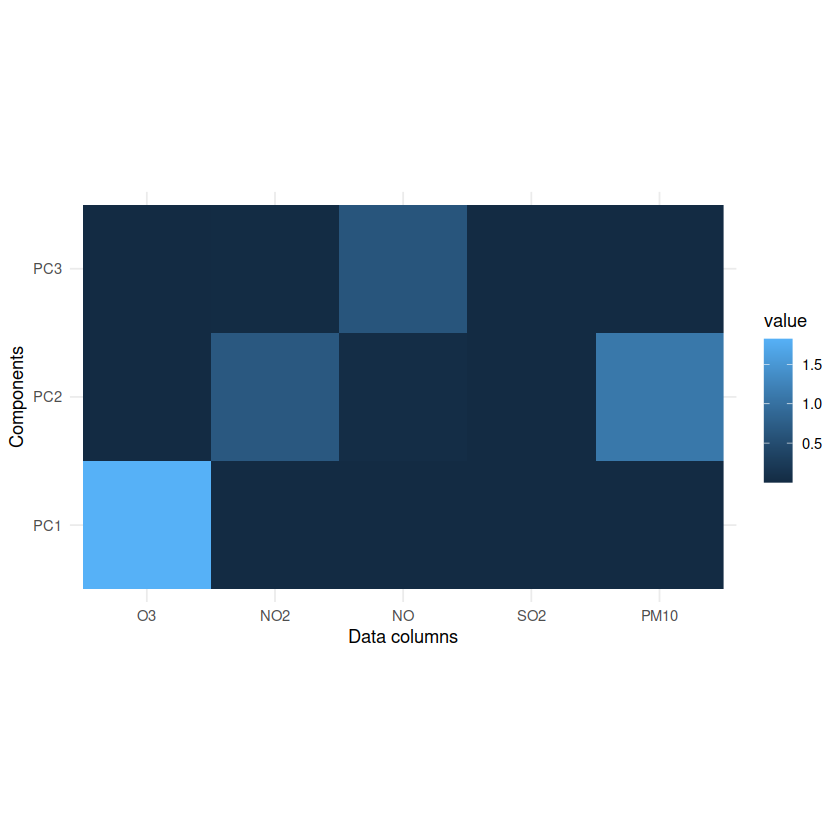

In [40]:
ggplot(melt(t(enc_w3)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

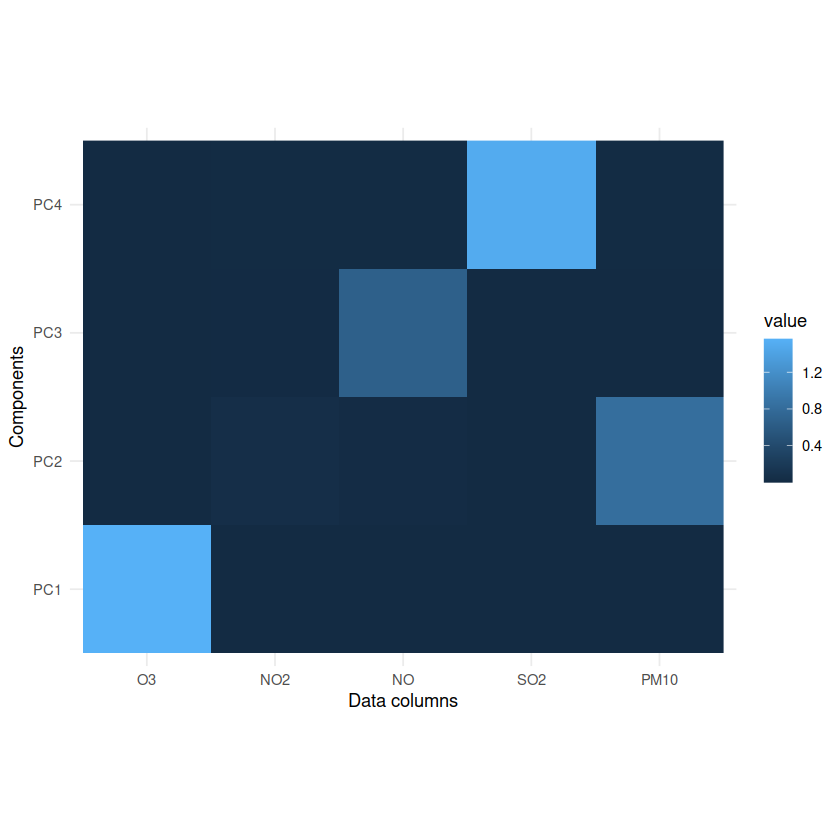

In [41]:
ggplot(melt(t(enc_w4)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()